In [1]:
# importing the dependencies
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [37]:
# loading the dataset
train_df = pd.read_csv("dataset/sign_mnist_train.csv")
test_df = pd.read_csv("dataset/sign_mnist_test.csv")
test = pd.read_csv("dataset/sign_mnist_test.csv")
train = pd.read_csv("dataset/sign_mnist_train.csv")
y2 = test['label']
y1 = train['label']

In [38]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [39]:
# managing missing label 9 
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [40]:
x_train = train_df.values
x_test = test_df.values

In [41]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

In [53]:
X_train = x_train.reshape(27455, 28, 28)
X_test = x_test.reshape(7172, 28, 28)

In [54]:
X_train_md = X_train
X1 = []
for i in X_train_md:
    tmp = np.zeros((4,28))

    i = np.vstack((i,tmp))

    tmp = np.zeros((32,4))
    i = np.hstack((i, tmp))
    X1.append(i)
    
X_test_md = X_test
X2 = []
for i in X_test_md:
    tmp = np.zeros((4,28))

    i = np.vstack((i,tmp))

    tmp = np.zeros((32,4))
    i = np.hstack((i, tmp))
    X2.append(i)

In [55]:
X_train = np.stack((X1,)*3, axis=-1)

X_test = np.stack((X2,)*3, axis=-1)

In [56]:
print("X-Test Shape: {}".format(X_test.shape))
print("X-Train Shape: {}".format(X_train.shape))
print("Y-Test Shape: {}".format(y_test.shape))
print("Y-Train Shape: {}".format(y_train.shape))
print("Each Image Shape: {}".format(X_train[0].shape))

X-Test Shape: (7172, 32, 32, 3)
X-Train Shape: (27455, 32, 32, 3)
Y-Test Shape: (7172, 24)
Y-Train Shape: (27455, 24)
Each Image Shape: (32, 32, 3)


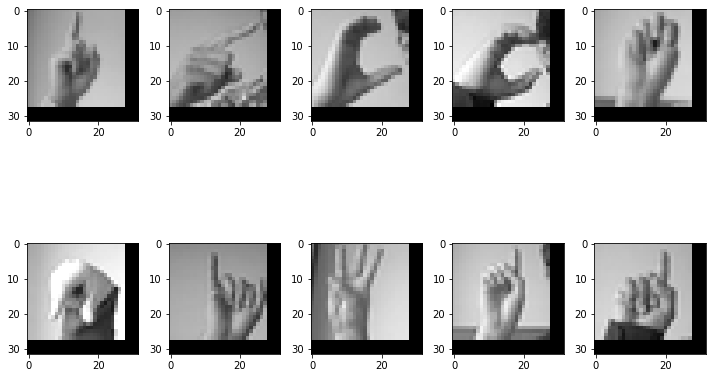

In [57]:
# Preview of first 5 images

f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k])
        k += 1
    plt.tight_layout() 

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
base_model.trainable = False ## Not trainable weights


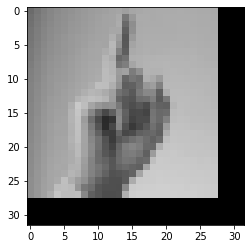

In [13]:
plt.imshow(X_train[0])
plt.show()

In [14]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [15]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(24, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [72]:
model.fit(X_train, y_train, epochs=5, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/5
687/687 [==============================] - 158s 226ms/step - loss: 0.0103 - accuracy: 0.9976 - val_loss: 0.0082 - val_accuracy: 0.9982
Epoch 2/5
687/687 [==============================] - 157s 228ms/step - loss: 0.0088 - accuracy: 0.9980 - val_loss: 0.0183 - val_accuracy: 0.9942
Epoch 3/5
687/687 [==============================] - 154s 224ms/step - loss: 0.0083 - accuracy: 0.9980 - val_loss: 0.0133 - val_accuracy: 0.9965
Epoch 4/5
687/687 [==============================] - 157s 228ms/step - loss: 0.0087 - accuracy: 0.9981 - val_loss: 0.0089 - val_accuracy: 0.9975
Epoch 5/5
687/687 [==============================] - 157s 229ms/step - loss: 0.0092 - accuracy: 0.9976 - val_loss: 0.0235 - val_accuracy: 0.9916


In [71]:
from tensorflow.keras.models import load_model

# model.save("vgg16.h5")
# model.save_weights("vgg16_weights.h5")

In [73]:
model.evaluate(X_test, y_test)

225/225 [==============================] - 38s 170ms/step - loss: 0.4736 - accuracy: 0.9027


[0.473594069480896, 0.902677059173584]

In [40]:
y_pred = model.predict(X_test)

225/225 [==============================] - 43s 189ms/step


In [63]:
y_pred_labels = [np.argmax(i) for i in  y_pred]
np.array(y_pred_labels)

array([6, 5, 9, ..., 2, 4, 2], dtype=int64)

In [67]:
y_test_labels = [np.argmax(i) for i in  y_test]

In [59]:
loaded_model = load_model("vgg16.h5")
loaded_model.load_weights("vgg16_weights.h5")

In [60]:
loaded_model.evaluate(X_test, y_test)

225/225 [==============================] - 45s 193ms/step - loss: 0.3726 - accuracy: 0.9087


[0.3726140260696411, 0.9086726307868958]

In [62]:
y_pred = loaded_model.predict(X_test)

225/225 [==============================] - 46s 201ms/step


In [64]:
y_pred_labels = [np.argmax(i) for i in  y_pred]
np.array(y_pred_labels)

array([6, 5, 9, ..., 2, 4, 2], dtype=int64)

In [69]:
np.array(y2)
accuracy_score(np.array(y_test_labels), np.array(y_pred_labels))

0.9086726157278304

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_labels, y_pred_labels)

0.9086726157278304

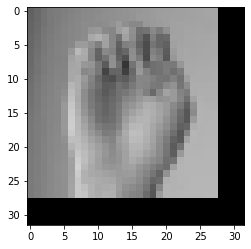

Original: 4, Predicted: 4


In [78]:
test_index = 1234
plt.imshow(X_test[test_index])
plt.show()
print("Original: {}, Predicted: {}".format(y_test_labels[test_index], y_pred_labels[test_index]))